In [14]:
import os

from __future__ import annotations

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import xarray as xr

from utils.configure_results import configure_output_path
from utils.calculation import sample_scale_free_degrees, theoretical_scale_free_distribution

from tqdm import tqdm

# グラフの色指定
colors = ["tab:blue", "tab:orange", "tab:green", "tab:red", "tab:purple", "tab:brown", "tab:pink", "tab:gray", "tab:olive", "tab:cyan"]
markers = ["o", "^", "s", "D", "P", "X", "d", "H", "v", "p", "*"]
linestyles = ["-", "--", "-.", ":", "-", "--", "-.", ":", "-", "--", "-.", ":"]

# グラフ全体のフォント設定
# plt.rcParams['font.family'] = 'serif'  # 全体のフォントをSerifに設定
# plt.rcParams['mathtext.fontset'] = 'cm'  # 数式のフォントをComputer Modernに設定
# plt.rcParams['mathtext.rm'] = 'serif'  # TeXの通常フォントをSerifに設定
# plt.rcParams['font.size'] = 18  # デフォルトフォントサイズ
# plt.rcParams['axes.labelsize'] = 18  # 軸ラベルのフォントサイズ
# plt.rcParams['axes.titlesize'] = 22  # タイトルのフォントサイズ
# plt.rcParams['legend.fontsize'] = 16  # 凡例のフォントサイズ
# plt.rcParams['grid.color'] = 'gray'  # グリッドの色を薄い灰色に設定
# plt.rcParams['grid.linestyle'] = ':'  # グリッドを点線に設定
# plt.rcParams['grid.linewidth'] = 0.5  # グリッドの線幅を設定

In [15]:
show_N = 100_000 # 頂点数
pow_k_min = 5
pow_gamma = 2.5

# 固定パラメータ
k_out_min = 5
batch_size = 16
mu = 1.0
show_rho0 = 0.1
show_T = 3
network_type = "DirectedCMInPow"

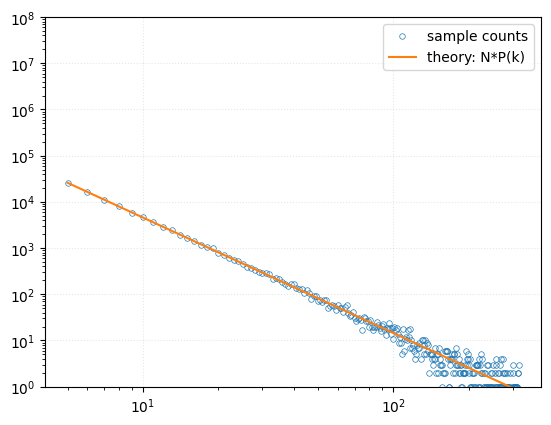

sample
 --> k_min: 5
 --> k_max: 316
 --> mean: 11.9284
theory
 --> mean: 11.980437366583425


In [16]:
n_sample = show_N # サンプル数

k_max = int(np.sqrt(show_N))
k_vals = np.arange(pow_k_min, k_max + 1)
sample_k_ave, sample_counts = sample_scale_free_degrees(n_sample, pow_k_min, k_max, pow_gamma)
theory_k_ave, theory_pk = theoretical_scale_free_distribution(pow_k_min, k_max, pow_gamma)

plt.figure()
plt.ylim(1e0, 1e8)
plt.loglog(k_vals, sample_counts, linestyle="", marker="o", markerfacecolor="none", color=colors[0], markersize=4, markeredgewidth=0.5, label="sample counts")
plt.loglog(k_vals, show_N * theory_pk, linestyle="-", color=colors[1], label="theory: N*P(k)")
plt.grid(True, alpha=0.3, linestyle=":")
plt.legend()
plt.show()

print("sample")
print(" --> k_min:", pow_k_min)
print(" --> k_max:", k_vals[sample_counts > 0].max())
print(" --> mean:", sample_k_ave)

print("theory")
print(" --> mean:", theory_k_ave)


In [17]:
pi_type = "Pow"
ebcm_dir = os.path.abspath(os.path.join("..", "out", "ebcm", "lock", "directed-infty"))
ebcm_path = os.path.join(ebcm_dir, f"{pi_type}")
g = pd.read_csv(os.path.join(ebcm_path, "gd_zero.csv"))
g = g.set_index(["T", "rho0", "lambda_d", "mu"]).to_xarray()
rho0_values = g["rho0"].values
lambda_d_values = g["lambda_d"].values
theta_d_infty = g["theta_d"].squeeze()


In [18]:
# gdp = pd.read_csv(os.path.join(output_dir, "gdp_zero.csv"))
# gdp_x = np.zeros(len(rho0_values), dtype=np.ndarray)
# gdp_y = np.zeros(len(rho0_values), dtype=np.ndarray)

# gdpp = pd.read_csv(os.path.join(output_dir, "gdpp_zero.csv"))
# gdpp_x = np.zeros(len(rho0_values), dtype=np.ndarray)
# gdpp_y = np.zeros(len(rho0_values), dtype=np.ndarray)

# gd_gdp = pd.read_csv(os.path.join(output_dir, "gd_gdp_zero.csv"))
# gd_gdp_x = np.zeros(len(rho0_values), dtype=np.ndarray)
# gd_gdp_y = np.zeros(len(rho0_values), dtype=np.ndarray)

# gd_gdp_gdpp = pd.read_csv(os.path.join(output_dir, "gd_gdp_gdpp_zero.csv"))

# for rho0_idx, rho0 in enumerate(tqdm(rho0_values)):
#     x1 = []
#     y1 = []

#     x2 = []
#     y2 = []

#     x3 = []
#     y3 = []

#     arr_gdp = gdp[gdp["rho0"] == rho0]
#     arr_gdpp = gdpp[gdpp["rho0"] == rho0]
#     arr_gd_gdp = gd_gdp[gd_gdp["rho0"] == rho0]

#     for lambda_d_idx, lambda_d in enumerate(lambda_d_values):
#         points_gdp = arr_gdp[arr_gdp["lambda_d"] == lambda_d]
#         points_gdp = points_gdp["theta_d"].values
#         for point in points_gdp:
#             x1.append(lambda_d)
#             y1.append(point)

#         points_gdpp = arr_gdpp[arr_gdpp["lambda_d"] == lambda_d]
#         points_gdpp = points_gdpp["theta_d"].values
#         for point in points_gdpp:
#             x2.append(lambda_d)
#             y2.append(point)

#         points_gd_gdp = arr_gd_gdp[arr_gd_gdp["lambda_d"] == lambda_d]
#         points_gd_gdp = points_gd_gdp["theta_d"].values
#         for point in points_gd_gdp:
#             x3.append(lambda_d)
#             y3.append(point)

#     gdp_x[rho0_idx] = x1
#     gdp_y[rho0_idx] = y1

#     gdpp_x[rho0_idx] = x2
#     gdpp_y[rho0_idx] = y2

#     gd_gdp_x[rho0_idx] = x3
#     gd_gdp_y[rho0_idx] = y3


In [19]:
# idx_list = [350, 400, 580, 610, 1000]
# fig, ax = plt.subplots(1, len(idx_list), figsize=(5*len(idx_list), 5))
# for idx, idx_val in enumerate(idx_list):
#     ax[idx].plot(lambda_d_values, theta_d_infty[idx_val, :])
#     ax[idx].scatter(gdp_x[idx_val], gdp_y[idx_val])
#     ax[idx].scatter(gdpp_x[idx_val], gdpp_y[idx_val], marker="x")
#     ax[idx].set_title(f"rho0 = {rho0_values[idx_val]}")
#     ax[idx].set_xlabel("lambda_d")
#     ax[idx].set_ylabel("theta_d")
#     ax[idx].grid(linestyle='--')

# plt.tight_layout()
# plt.show()

In [20]:
gdp = pd.read_csv(os.path.join(ebcm_path, "gdp_zero.csv"))
gdp_x = np.zeros(len(rho0_values), dtype=np.ndarray)
gdp_y = np.zeros(len(rho0_values), dtype=np.ndarray)

gdpp = pd.read_csv(os.path.join(ebcm_path, "gdpp_zero.csv"))
gdpp_x = np.zeros(len(rho0_values), dtype=np.ndarray)
gdpp_y = np.zeros(len(rho0_values), dtype=np.ndarray)

gd_gdp = pd.read_csv(os.path.join(ebcm_path, "gd_gdp_zero.csv"))
gd_gdp_x = np.zeros(len(rho0_values), dtype=np.ndarray)
gd_gdp_y = np.zeros(len(rho0_values), dtype=np.ndarray)

gd_gdp_gdpp = pd.read_csv(os.path.join(ebcm_path, "gd_gdp_gdpp_zero.csv"))

In [21]:
lambda_c_horizontal = []
lambda_c_vertical = []

lambda_c2_horizontal = []
lambda_c2_vertical = []

for rho0_idx, rho0 in enumerate(tqdm(rho0_values)):
    arr1 = gd_gdp[gd_gdp["rho0"] == rho0]
    arr1 = arr1[arr1["T"] == show_T]
    arr2 = gd_gdp_gdpp[gd_gdp_gdpp["rho0"] == rho0]
    arr2 = arr2[arr2["T"] == show_T]

    cv = []
    cv2 = []
    for lambda_d_idx, lambda_d in enumerate(lambda_d_values):
        points1 = arr1[arr1["lambda_d"] == lambda_d]
        points1 = points1[points1["T"]==show_T]
        points2 = arr2[arr2["lambda_d"] == lambda_d]
        points2 = points2[points2["T"]==show_T]
        
        if(len(points1) > 0):
            cv.append(lambda_d)

        if(len(points2) > 0):
            cv2.append(lambda_d)

    if len(cv) > 0:
        lambda_c_horizontal.append(rho0)
        lambda_c_vertical.append(max(np.array(cv)))

    if len(cv2) > 0:
        lambda_c2_horizontal.append(rho0)
        lambda_c2_vertical.append(max(np.array(cv2)))


100%|██████████| 201/201 [00:07<00:00, 28.61it/s]


In [22]:
all_results = {}

T_list = [2, 3, 4]
df_all = pd.DataFrame()

for T in T_list:
    abst = "valious_T"
    sim_path = configure_output_path(show_N, abst, T, network_type, k_out_min)
    print(f"output_path: {os.path.relpath(sim_path)}")


    for i in range(batch_size):
        index = f"{i:02d}"
        file_name = f'results_{index}.csv'
        file_path = os.path.join(sim_path, file_name)
        
        df = pd.read_csv(file_path)
        if df is None:
            continue
        
        # バッチインデックスを調整（最初のバッチ以外、時系列データの場合のみ）
        if not df_all.empty and 'itr' in df.columns:
            max_itr = int(df_all['itr'].max())
            df['itr'] = df['itr'] + max_itr + 1
        
        df["T"] = T
        df_all = pd.concat([df_all, df], ignore_index=True)

df_all["N"] = show_N
sim = df_all.set_index(['N', 'T', 'itr', 'rho_0', 'lambda_d', 'lambda_u', 'mu']).to_xarray()
initial_adopted_time = sim['initial_adopted_time']
final_adopted_time = sim['final_adopted_time']
sim_R = sim['R']
sim_Phi = sim['Phi']

output_path: ../app/out/fastsar/valious_T/DirectedCMInPow/threshold=2/N=100000/kInMin=5
output_path: ../app/out/fastsar/valious_T/DirectedCMInPow/threshold=3/N=100000/kInMin=5
output_path: ../app/out/fastsar/valious_T/DirectedCMInPow/threshold=4/N=100000/kInMin=5


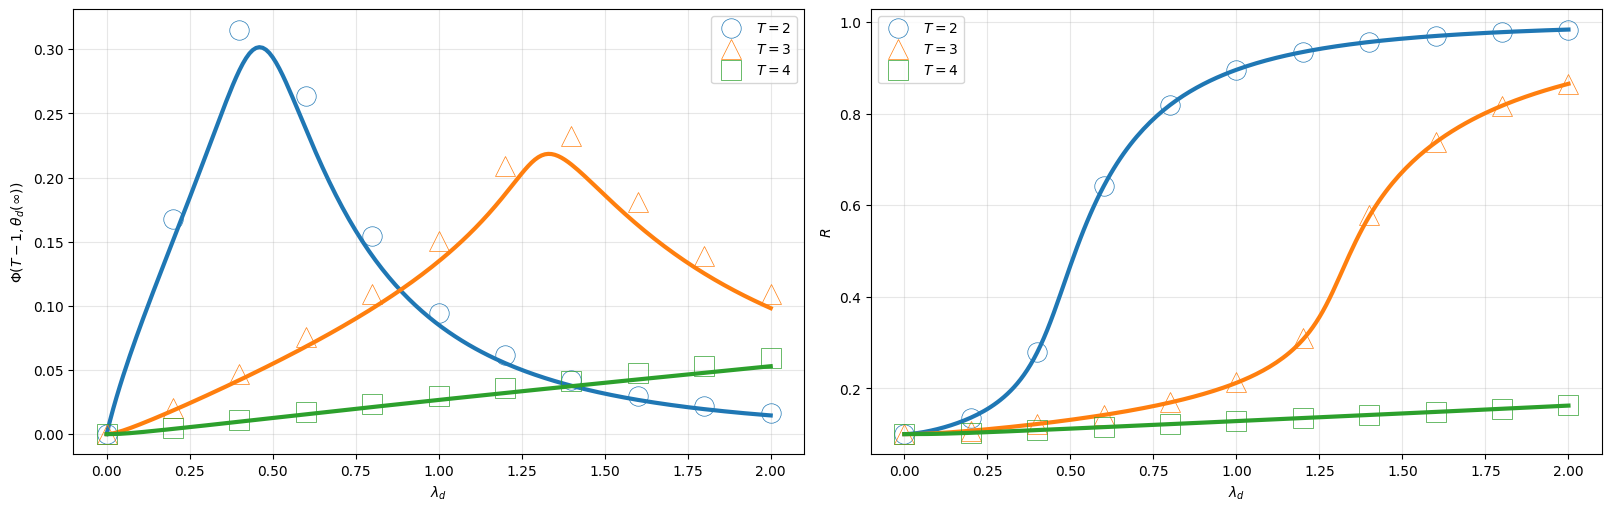

In [23]:
fig, ax = plt.subplots(1, 2, figsize=(8*2, 5), constrained_layout=True)

for idx, T in enumerate(T_list):
    p0=sim_Phi.sel(rho_0=show_rho0).sel(T=T).squeeze().mean(dim='itr')/show_N
    ax[0].plot(p0["lambda_d"], p0, linestyle="", marker=markers[idx], markersize=14, markerfacecolor="none", markeredgecolor=colors[idx], markeredgewidth=0.5, label=f"$T={T}$")
    p1=g["Phi"].sel(rho0=show_rho0).sel(T=T).squeeze()
    ax[0].plot(p1["lambda_d"], p1, linestyle="-", linewidth=3.0, color=colors[idx])

    p0=sim_R.sel(rho_0=show_rho0).sel(T=T).squeeze().mean(dim='itr')/show_N
    ax[1].plot(p0["lambda_d"], p0, linestyle="", marker=markers[idx], markersize=14, markerfacecolor="none", markeredgecolor=colors[idx], markeredgewidth=0.5, label=f"$T={T}$")
    p1=g["R"].sel(rho0=show_rho0).sel(T=T).squeeze()
    ax[1].plot(p1["lambda_d"], p1, linestyle="-", linewidth=3.0, color=colors[idx])

ax[0].set_xlabel(rf"$\lambda_d$")
ax[0].set_ylabel(rf"$\Phi(T-1, \theta_d(\infty))$")
ax[0].grid(linestyle="-", alpha=0.3)
ax[0].legend()

ax[1].set_xlabel(rf"$\lambda_d$")
ax[1].set_ylabel(rf"$R$")
ax[1].grid(linestyle="-", alpha=0.3)
ax[1].legend()
plt.show()

In [24]:
all_results = {}

df_all = pd.DataFrame()

abst = "map_r_ld"
sim_path = configure_output_path(show_N, abst, show_T, network_type, k_out_min)
print(f"output_path: {os.path.relpath(sim_path)}")


for i in range(batch_size):
    index = f"{i:02d}"
    file_name = f'results_{index}.csv'
    file_path = os.path.join(sim_path, file_name)
    
    df = pd.read_csv(file_path)
    if df is None:
        continue
    
    # バッチインデックスを調整（最初のバッチ以外、時系列データの場合のみ）
    if not df_all.empty and 'itr' in df.columns:
        max_itr = int(df_all['itr'].max())
        df['itr'] = df['itr'] + max_itr + 1
    
    df["T"] = show_T
    df_all = pd.concat([df_all, df], ignore_index=True)

df_all["N"] = show_N
sim = df_all.set_index(['N', 'T', 'itr', 'rho_0', 'lambda_d', 'lambda_u', 'mu']).to_xarray()
initial_adopted_time = sim['initial_adopted_time']
final_adopted_time = sim['final_adopted_time']
sim_R = sim['R']
sim_Phi = sim['Phi']

output_path: ../app/out/fastsar/map_r_ld/DirectedCMInPow/threshold=3/N=100000/kInMin=5


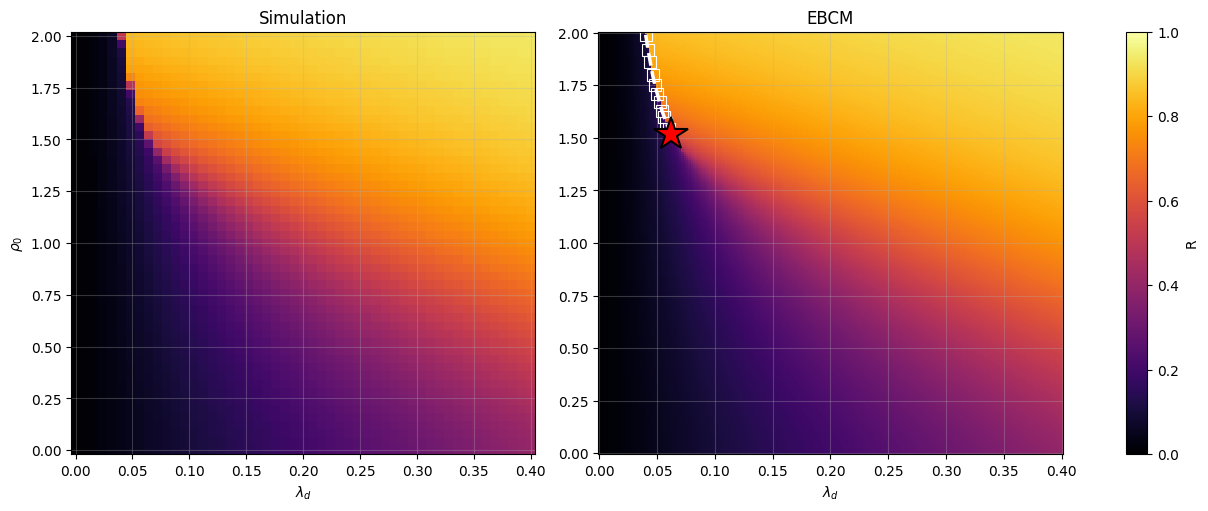

In [25]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5), constrained_layout=True)


p0=sim_R.squeeze().mean(dim='itr').T/show_N
p0.plot(
    ax=axes[0],
    cmap="inferno",
    vmin=0.0,
    vmax=1.0,
    add_colorbar=False
)

axes[0].grid(linestyle="-", alpha=0.3)
axes[0].set_title("Simulation")
axes[0].set_xlabel(rf"$\lambda_d$")
axes[0].set_ylabel(rf"$\rho_0$")

p1=g["R"].sel(T=show_T).T.plot(
    ax=axes[1],
    cmap="inferno",
    vmin=0.0,
    vmax=1.0,
    add_colorbar=False
)

axes[1].plot(lambda_c_horizontal, lambda_c_vertical,
             linestyle="--", color="w", linewidth=2.5,
             marker="s", markersize=8,
             markerfacecolor="none", markeredgecolor="w",
             markeredgewidth=0.8)

axes[1].plot(lambda_c2_horizontal, lambda_c2_vertical,
             linestyle="", marker="*", markersize=25,
             markerfacecolor="red", markeredgecolor="black",
             markeredgewidth=1.5)

axes[1].grid(linestyle="-", alpha=0.3)
axes[1].set_title("EBCM")
axes[1].set_xlabel(rf"$\lambda_d$")
axes[1].set_ylabel("")

fig.colorbar(p1, ax=axes, label="R")
plt.show()


In [26]:
pi_list = ["Pow", "Poi"]

ebcm_df_all = pd.DataFrame()

lambda_c_horizontal = [[], []]
lambda_c_vertical = [[], []]

lambda_c2_horizontal = [[], []]
lambda_c2_vertical = [[], []]

for pi_type_idx, pi_type in enumerate(pi_list):
    ebcm_path = os.path.join(ebcm_dir, pi_type)
    df = pd.read_csv(os.path.join(ebcm_path, "gd_zero.csv"))

    df["pi_type"] = pi_type
    ebcm_df_all = pd.concat([ebcm_df_all, df], ignore_index=True)

    gdp = pd.read_csv(os.path.join(ebcm_path, "gdp_zero.csv"))
    gdp_x = np.zeros(len(rho0_values), dtype=np.ndarray)
    gdp_y = np.zeros(len(rho0_values), dtype=np.ndarray)

    gdpp = pd.read_csv(os.path.join(ebcm_path, "gdpp_zero.csv"))
    gdpp_x = np.zeros(len(rho0_values), dtype=np.ndarray)
    gdpp_y = np.zeros(len(rho0_values), dtype=np.ndarray)

    gd_gdp = pd.read_csv(os.path.join(ebcm_path, "gd_gdp_zero.csv"))
    gd_gdp_x = np.zeros(len(rho0_values), dtype=np.ndarray)
    gd_gdp_y = np.zeros(len(rho0_values), dtype=np.ndarray)

    gd_gdp_gdpp = pd.read_csv(os.path.join(ebcm_path, "gd_gdp_gdpp_zero.csv"))

    for rho0_idx, rho0 in enumerate(tqdm(rho0_values)):
        arr1 = gd_gdp[gd_gdp["rho0"] == rho0]
        arr1 = arr1[arr1["T"] == show_T]
        arr2 = gd_gdp_gdpp[gd_gdp_gdpp["rho0"] == rho0]
        arr2 = arr2[arr2["T"] == show_T]

        cv = []
        cv2 = []
        for lambda_d_idx, lambda_d in enumerate(lambda_d_values):
            points1 = arr1[arr1["lambda_d"] == lambda_d]
            points1 = points1[points1["T"]==show_T]
            points2 = arr2[arr2["lambda_d"] == lambda_d]
            points2 = points2[points2["T"]==show_T]
            
            if(len(points1) > 0):
                cv.append(lambda_d)

            if(len(points2) > 0):
                cv2.append(lambda_d)

        if len(cv) > 0:
            lambda_c_horizontal[pi_type_idx].append(rho0)
            lambda_c_vertical[pi_type_idx].append(max(np.array(cv)))

        if len(cv2) > 0:
            lambda_c2_horizontal[pi_type_idx].append(rho0)
            lambda_c2_vertical[pi_type_idx].append(max(np.array(cv2)))

ebcm_df_all = ebcm_df_all.set_index(["T", "rho0", "lambda_d", "mu", "pi_type"]).to_xarray()

100%|██████████| 201/201 [00:07<00:00, 28.02it/s]


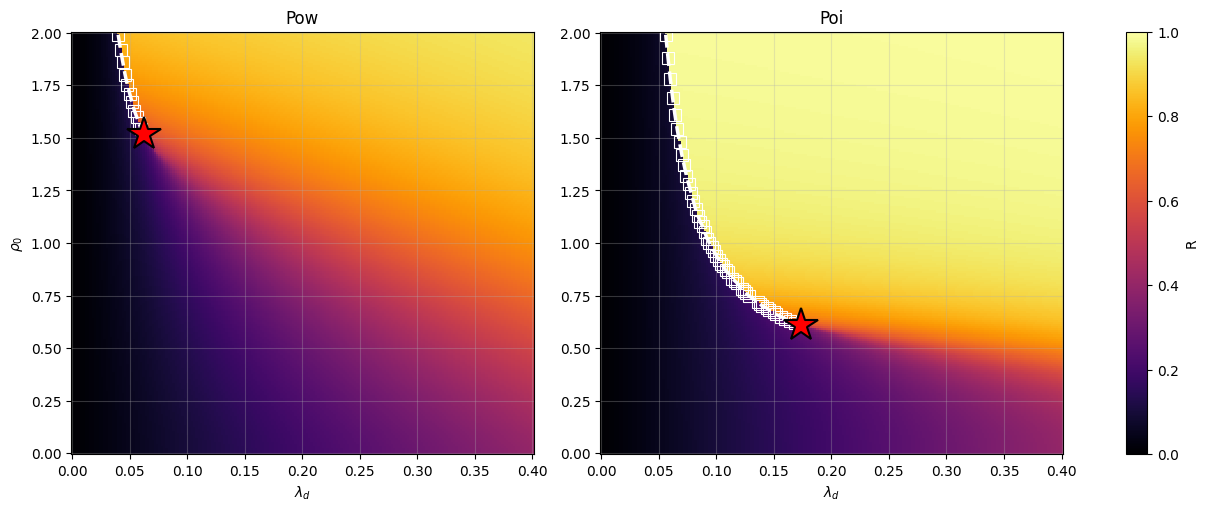

In [27]:
fig, axes = plt.subplots(1, len(pi_list), figsize=(6*len(pi_list), 5), constrained_layout=True)

for idx, pi_type in enumerate(pi_list):
    p=ebcm_df_all["R"].sel(T=show_T).sel(pi_type=pi_type).T.plot(
        ax=axes[idx],
        cmap="inferno",
        vmin=0.0,
        vmax=1.0,
        add_colorbar=False
    )

    axes[idx].plot(lambda_c_horizontal[idx], lambda_c_vertical[idx],
                linestyle="--", color="w", linewidth=2.5,
                marker="s", markersize=8,
                markerfacecolor="none", markeredgecolor="w",
                markeredgewidth=0.8)

    axes[idx].plot(lambda_c2_horizontal[idx], lambda_c2_vertical[idx],
                linestyle="", marker="*", markersize=25,
                markerfacecolor="red", markeredgecolor="black",
                markeredgewidth=1.5)

    axes[idx].grid(linestyle="-", alpha=0.3)
    axes[idx].set_title(f"{pi_type}")
    axes[idx].set_xlabel(rf"$\lambda_d$")
    if (idx != 0):
        axes[idx].set_ylabel("")
    else:
        axes[idx].set_ylabel(rf"$\rho_0$")

fig.colorbar(p, ax=axes, label="R")
plt.show()

In [28]:
Z = theory_k_ave
lambda_c_d = mu/(Z-1.0)
print(f"critical directed lambda: {lambda_c_d}")

A=(Z**2-Z)/Z
lambda_c_u = mu/(A-1.0)
print(f"critical undirected lambda: {lambda_c_u}")

critical directed lambda: 0.09107105360331845
critical undirected lambda: 0.10019600978091475


In [29]:
ebcm_dir = os.path.abspath(os.path.join("..", "out", "ebcm", "directed-infty"))

ebcm_df_all = pd.DataFrame()

for pi_type_idx, pi_type in enumerate(pi_list):
    ebcm_path = os.path.join(ebcm_dir, pi_type)
    df = pd.read_csv(os.path.join(ebcm_path, "gd_zero.csv"))

    df["pi_type"] = pi_type
    ebcm_df_all = pd.concat([ebcm_df_all, df], ignore_index=True)


ebcm_dir = os.path.abspath(os.path.join("..", "out", "ebcm", "undirected-infty"))
ebcm_path = os.path.join(ebcm_dir, f"Poi")
df = pd.read_csv(os.path.join(ebcm_path, "gu_zero.csv"))

df["pi_type"] = "un-Poi"
ebcm_df_all = pd.concat([ebcm_df_all, df], ignore_index=True)

ebcm_path = os.path.join(ebcm_dir, f"Pow")
df = pd.read_csv(os.path.join(ebcm_path, "gu_zero.csv"))

df["pi_type"] = "un-Pow"
ebcm_df_all = pd.concat([ebcm_df_all, df], ignore_index=True)

ebcm_df_all = ebcm_df_all.set_index(["T", "rho0", "lambda_d", "mu", "pi_type"]).to_xarray()


FileNotFoundError: [Errno 2] No such file or directory: '/Users/black/directed-network-simulations/out/ebcm/directed-infty/Poi/gd_zero.csv'

In [ ]:
all_results = {}

ku_ave = 12.0

network_list = ["DirectedCMInPow", "DirectedCMOutPow", "ER"]
df_all = pd.DataFrame()
sim_result = [[] for _ in range(len(network_list))]

for idx, network_type in enumerate(network_list):
    abst = "u-d"
    symbol_k = k_out_min if network_type != "ER" else ku_ave
    sim_path = configure_output_path(show_N, abst, 1, network_type, symbol_k)
    print(f"output_path: {os.path.relpath(sim_path)}")


    for i in range(batch_size):
        index = f"{i:02d}"
        file_name = f'results_{index}.csv'
        file_path = os.path.join(sim_path, file_name)
        
        df = pd.read_csv(file_path)
        if df is None:
            continue
        
        # バッチインデックスを調整（最初のバッチ以外、時系列データの場合のみ）
        if not df_all.empty and 'itr' in df.columns:
            max_itr = int(df_all['itr'].max())
            df['itr'] = df['itr'] + max_itr + 1
        
        df["T"] = 1
        sim_result[idx] = df.set_index(['T', 'itr', 'rho_0', 'lambda_d', 'lambda_u', 'mu']).to_xarray()

output_path: ../app/out/fastsar/u-d/DirectedCMInPow/threshold=1/N=100000/kInMin=5
output_path: ../app/out/fastsar/u-d/DirectedCMOutPow/threshold=1/N=100000/kOutMin=5
output_path: ../app/out/fastsar/u-d/ER/threshold=1/N=100000/z=12.00


network_type: DirectedCMInPow, p0: ('lambda_d',)
network_type: DirectedCMOutPow, p0: ('lambda_d',)
network_type: ER, p0: ('lambda_u',)


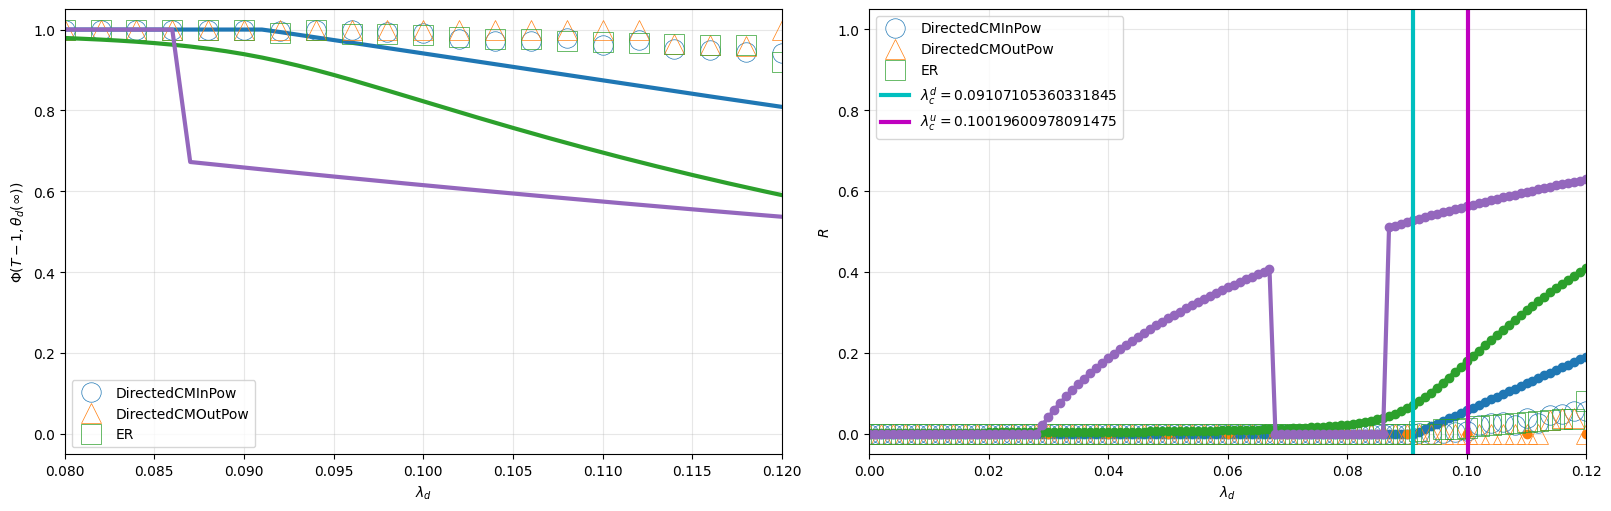

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(8*2, 5), constrained_layout=True)

for idx, network_type in enumerate(network_list):
    p0=sim_result[idx]["Phi"].squeeze().mean(dim='itr')/show_N
    print(f"network_type: {network_type}, p0: {p0.dims}")
    x = p0["lambda_d"].values if network_type != "ER" else p0["lambda_u"].values
    ax[0].plot(x, p0, linestyle="", marker=markers[idx], markersize=14, markerfacecolor="none", markeredgecolor=colors[idx], markeredgewidth=0.5, label=f"{network_type}")
    pi_type = pi_list[idx] if network_type != "ER" else "un-Poi"
    rho0 = 0.0
    p1=ebcm_df_all["Phi"].sel(pi_type=pi_type).sel(rho0=rho0).sel(T=1).squeeze()
    ax[0].plot(p1["lambda_d"], p1, linestyle="-", linewidth=3.0, color=colors[idx])

    p0=sim_result[idx]["R"].squeeze().mean(dim='itr')/show_N
    x = p0["lambda_d"].values if network_type != "ER" else p0["lambda_u"].values
    ax[1].plot(x, p0, linestyle="", marker=markers[idx], markersize=14, markerfacecolor="none", markeredgecolor=colors[idx], markeredgewidth=0.5, label=f"{network_type}")
    
    pi_type = pi_list[idx] if network_type != "ER" else "un-Poi"
    rho0 = 0.0
    p1=ebcm_df_all["R"].sel(pi_type=pi_type).sel(rho0=rho0).sel(T=1).squeeze()
    ax[1].plot(p1["lambda_d"], p1, linestyle="-", marker="o", linewidth=3.0, color=colors[idx])

p1=ebcm_df_all["Phi"].sel(pi_type="un-Pow").sel(rho0=rho0).sel(T=1).squeeze()
ax[0].plot(p1["lambda_d"], p1, linestyle="-", linewidth=3.0, color=colors[4])
p1=ebcm_df_all["R"].sel(pi_type="un-Pow").sel(rho0=rho0).sel(T=1).squeeze()
ax[1].plot(p1["lambda_d"], p1, linestyle="-", marker="o", linewidth=3.0, color=colors[4])

ax[0].set_xlabel(rf"$\lambda_d$")
ax[0].set_ylabel(rf"$\Phi(T-1, \theta_d(\infty))$")
ax[0].grid(linestyle="-", alpha=0.3)
ax[0].set_xlim(0.08, 0.12)
ax[0].legend()

ax[1].set_xlabel(rf"$\lambda_d$")
ax[1].set_ylabel(rf"$R$")

ax[1].axvline(x=lambda_c_d, color="c", linestyle="-", linewidth=3.0, label=rf"$\lambda_c^d={lambda_c_d}$")
ax[1].axvline(x=lambda_c_u, color="m", linestyle="-", linewidth=3.0, label=rf"$\lambda_c^u={lambda_c_u}$")
ax[1].grid(linestyle="-", alpha=0.3)
ax[1].set_xlim(0.00, 0.12)
ax[1].legend()
plt.show()

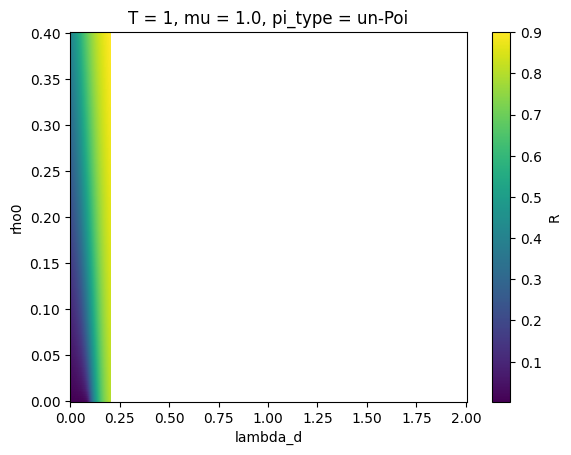

In [ ]:
ebcm_df_all["R"].sel(pi_type="un-Poi").sel(T=1).squeeze().plot()
